In [36]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
%autoreload 2

In [38]:
%matplotlib inline
from pathlib import Path
import functools
import itertools
from dataclasses import dataclass, fields

import pandas as pd
import numpy as np

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib import rcParams 

In [39]:
from lib import datawrap #E
from lib import bar # artist
from lib import color, position # encoders


#spath = Path("../../../draft/figures/code/")
rcParams['figure.dpi'] = 200

In [40]:
data = {'fruit': ['apple', 'orange', 'lemon', 'lime'], 
       'calories':[95, 67, 17, 20], 
       'juice':[True, True, False, False]}
df = pd.DataFrame(data)

In [41]:
data_bounds = {'calories':(17, 20), 'juice': [True], 'fruit':['orange']}
tau = datawrap.DataFrameWrapper(df)

In [42]:
tau.query({'calories':(17,20)})

[{'fruit': array(['apple', 'orange', 'lemon', 'lime'], dtype=object),
  'calories': array([95, 67, 17, 20], dtype=int64),
  'juice': array([ True,  True, False, False]),
  'k': array([0, 1, 2, 3], dtype=int64)}]

In [43]:
# should K be up front or last?
def constant_color(c):
     return lambda x: [mcolors.to_rgba(c) for _ in range(x)]

def constant_value(val):
     return lambda x: [val for _ in range(x)]

In [29]:
constant_color('k')(4)
constant_value(1)(6)

[1, 1, 1, 1, 1, 1]

In [46]:
# multivariate nu, make key always a tuple ([possibly data class])
fruitPos = position.Nominal({'apple': 0, 'orange': 2, 'lemon': 4, 'lime': 6})
juiceCol = color.Nominal({True: 'navy', False: 'purple'})
fruitCol = color.Nominal({'apple': 'xkcd:red', 'orange': 'orange', 
                         'lemon': 'gold', 'lime': 'lime'})
V = [('y', ('calories',), lambda x: x, lambda x: x), 
     ('x', ('fruit',), fruitPos, fruitPos.inverse),
     ('floor', None,  constant_value(0), None), 
     ('width', None, constant_value(.8), None),
     ('edgecolor', ('juice',), juiceCol, juiceCol.inverse),
     ('facecolor', ('fruit',), fruitCol, fruitCol.inverse),
     ('linewidth', None, constant_value(5), None),
     ('linestyle', None, constant_value((0, None)), None)]

In [47]:
dbar = bar.Bar()
for (p, f, nu, nu_inv) in V:
  pbar = dbar.compose_with_nu(pi, fi, nui, nu_inv)

ValueError: too many values to unpack (expected 4)

In [33]:
mu = pbar.mu(tau.query()[0])
pbar.qhat(**mu)

AttributeError: 'Bar' object has no attribute 'P_reqiured'

In [15]:
A = bar.TopologicalArtist(pbar).compose_with_tau(tau)

[(-1.0, 8.0), (0.0, 100.0)]

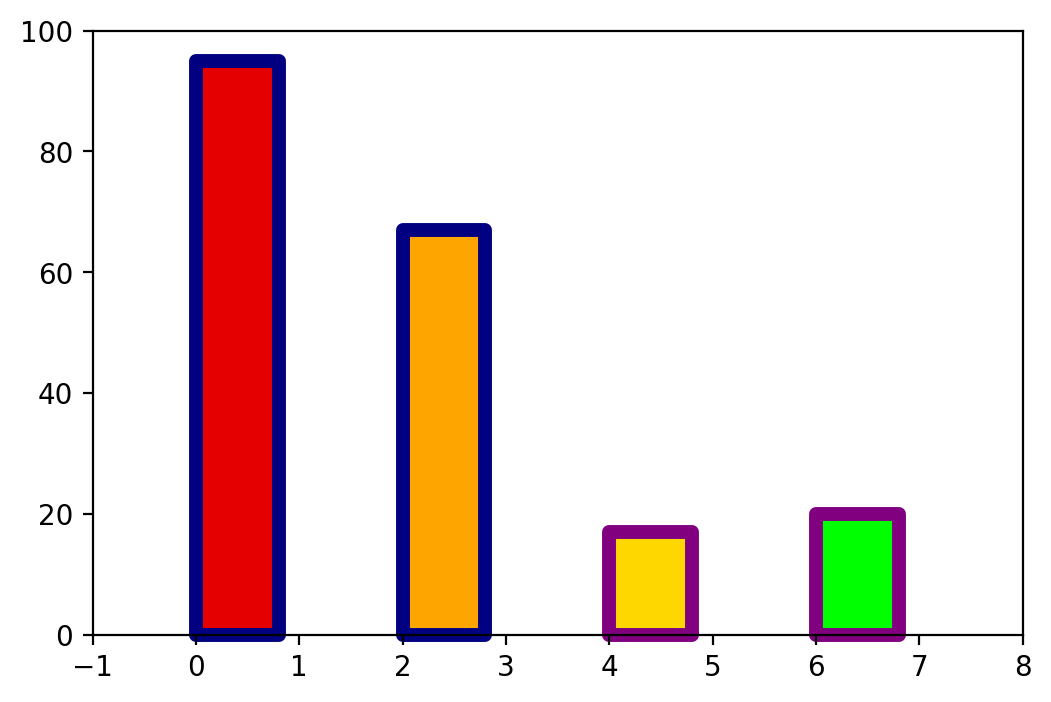

In [16]:
fig, ax = plt.subplots()
axesArtist = bar.GenericArtist(A)
ax.add_artist(axesArtist)
ax.set(xlim=(-1,8), ylim=(0, 100))

In [166]:
Vh = [('x', ('calories',), lambda x : x), 
     ('y', ('fruit',), 
          position.Nominal({'apple': 0, 'orange': 2, 'lemon': 4, 'lime': 6})),
     ('floor', None,  constant_value(0)), 
     ('width', None, constant_value(.8)),
     ('edgecolor', ('juice',),
          color.Nominal({True: 'navy', False: 'purple'})),
     ('facecolor', ('fruit',), 
          color.Nominal({'apple': 'xkcd:red', 'orange': 'orange', 
          'lemon': 'gold', 'lime': 'lime'})
     ),
     ('linewidth', None, constant_value(5)),
     ('linestyle', None, constant_value((0, None)))]

[(-1.0, 8.0), (0.0, 100.0)]

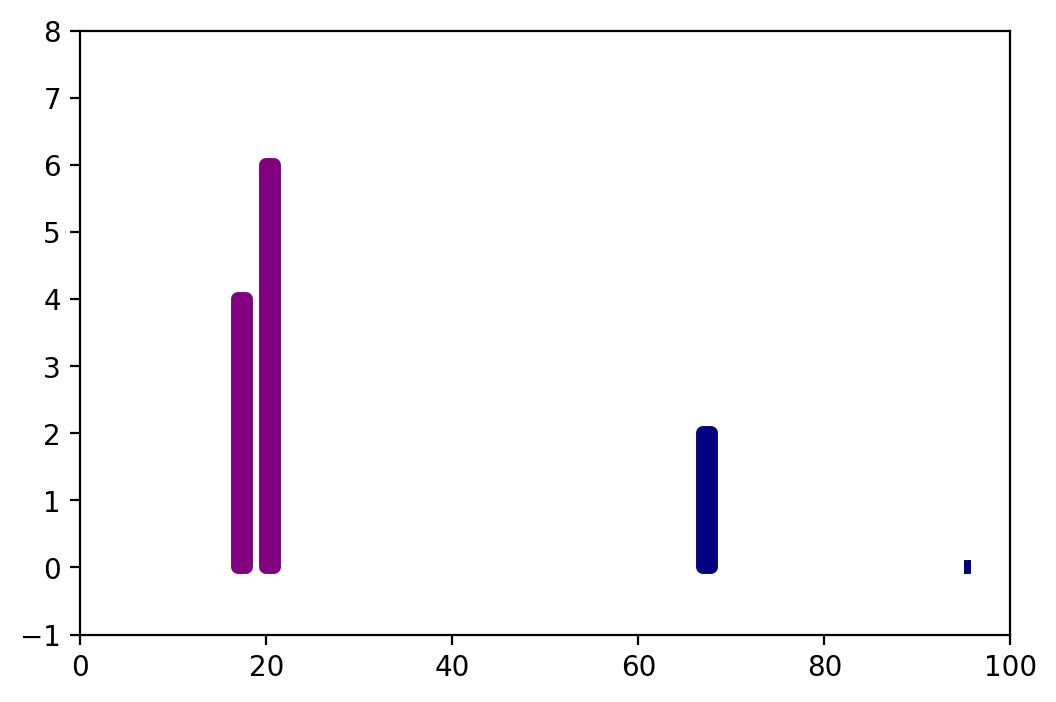

In [174]:
dbarh = bar.BarH()
for (pi, fi, nui) in Vh:
  pbarh = dbarh.compose_with_nu(pi, fi, nui)
Ah = bar.TopologicalArtist(pbarh).compose_with_tau(tau)
fig, ax = plt.subplots()
ax.add_artist(bar.GenericArtist(Ah))
ax.set(ylim=(-1,8), xlim=(0, 100))

In [124]:
axesArtist.get_screen_bounds_to_data_bounds(renderer)

(None, None)

In [127]:
A.data.query?

Signature:
A.data.query(
    data_bounds: Union[dict, NoneType] = None,
    sampling_rate: float = None,
) -> List[dict]
Docstring: <no docstring>
File:      c:\users\story\projects\proposal\code\matplottoy\data\fruit.py
Type:      method


In [154]:
A.graphic.mu(A.data.query()[0])

{'facecolor': [RGBA(r=0.8980392156862745, g=0.0, b=0.0, a=1.0),
  RGBA(r=1.0, g=0.6470588235294118, b=0.0, a=1.0),
  RGBA(r=1.0, g=0.8431372549019608, b=0.0, a=1.0),
  RGBA(r=0.0, g=1.0, b=0.0, a=1.0)],
 'yoff': [0, 0, 0, 0],
 'xoff': [0.8, 0.8, 0.8, 0.8],
 'y': array([95, 67, 17, 20], dtype=int64),
 'edgecolor': [RGBA(r=0.0, g=0.0, b=0.5019607843137255, a=1.0),
  RGBA(r=0.0, g=0.0, b=0.5019607843137255, a=1.0),
  RGBA(r=0.5019607843137255, g=0.0, b=0.5019607843137255, a=1.0),
  RGBA(r=0.5019607843137255, g=0.0, b=0.5019607843137255, a=1.0)],
 'linewidth': [5, 5, 5, 5],
 'linestyle': [(0, None), (0, None), (0, None), (0, None)],
 'x': array([0, 2, 4, 6])}